<a href="https://colab.research.google.com/github/fabnancyuhp/RENDUPYTHONISFSTAT/blob/master/MACHINE_LEARNING_DE_BASE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dans ce chapitre on montre des utilisations de la régression logistic et des arbres de décision. On aborde aussi les matrices de confusion, les scores auc ainsi que les courbe ROC.

# Machine learning sur les données diabete
Dans cette section, le but est de montrer l'utilisation du machine learning sur les  données diabéte. Le but est de prédire si la personne est testé positive pour le diabéte (valeur 1) ou non (valeur 0).<br>
Les données sont téléchargeable
* https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv
* https://1drv.ms/u/s!Am09h0q2OIX0cL4kHlfXInGaJn4?e=QcafFJ

On décrit les variables du dataset diabete si-dessous. Toutes les variables sont numériques.
   1. Number of times pregnant
   2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
   3. Diastolic blood pressure (mm Hg)
   4. Triceps skin fold thickness (mm)
   5. 2-Hour serum insulin (mu U/ml)
   6. Body mass index (weight in kg/(height in m)^2)
   7. Diabetes pedigree function
   8. Age (years)
   9. Class variable (0 or 1)

## Préparation des données

On commence par importer les données à l'aide du package pandas. Pandas est un package conçu pour manipuler des dataframe.

In [0]:
import pandas as pd
list_col = ['Plas_glucose_conc','Dias_blood_pressure','Triceps_skin_fold_thi','Hour_serum_insulin', \
            'Body_mass_index','Diabet_pedi_func','Age','Class_variable']
diabete  = pd.read_csv("pima-indians-diabetes.data.csv",sep=',',header=None,names=list_col) #dataframe des données

In [0]:
diabete.head(2)

,Plas_glucose_conc,Dias_blood_pressure,Triceps_skin_fold_thi,Hour_serum_insulin,Body_mass_index,Diabet_pedi_func,Age,Class_variable
6,148,72,35,0,33.6,0.627,50,1
1,85,66,29,0,26.6,0.351,31,0


La variable que l'on veut prédire est Class_variable (target_vlaues). Les autres variables sont les features, c'est à dire les variables explicatives. On va donc séparer ce dataframe en 2. X est l'ensemble des features, Y la variable à predire.

In [0]:
features = [colonne for colonne in diabete.columns if colonne!='Class_variable']
X = diabete[features]
Y = diabete['Class_variable']

On creer un ensemble d'apprentissage et de test. On utilise sklearn.model_selection.train_test_split. 

In [0]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,random_state=1998,test_size=0.3)

On affiche le début de X_train et le début de Y_train:

In [0]:
X_train.head(2)

,Plas_glucose_conc,Dias_blood_pressure,Triceps_skin_fold_thi,Hour_serum_insulin,Body_mass_index,Diabet_pedi_func,Age
4,128,70,0,0,34.3,0.303,24
6,147,80,0,0,29.5,0.178,50


In [0]:
Y_train.head(2)

4    0
6    1
Name: Class_variable, dtype: int64

## Régression logistique sur les données diabète
Voici le lien sur la documentation sklearn en lien avec la régression logistique: 
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html <br>
On va faire une régression logistique sur les données diabète en plusieurs étapes:
* on appelle le modèle de régression logistque
* on entraine le modèle avec X_train et Y_train

1/ On appelle le modèle de régression logistique. On a les paramètres suivants:
* penality : Used to specify the norm used in the penalization
* solver : Algorithm to use in the optimization problem.
* max_iter : Maximum number of iterations taken for the solvers to converge.

In [0]:
from sklearn.linear_model import LogisticRegression
clf  = LogisticRegression(penalty='l2',random_state=1998, solver='liblinear',max_iter=1000, multi_class='auto')

2/ On entraine le modèle avec X_train et Y_train:

In [0]:
clf.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=1000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=1998, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

3/ On calcule les prévisions puis la précision du modèle:

In [0]:
Y_pred = clf.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)  #proportion de prédictions correctes

0.7922077922077922

On affiche la matrice de confusion:

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)  #(VP, FP) (FN,VN) colonne : vraies valeurs ligne : valeurs prédites

array([[129,  21],
       [ 27,  54]], dtype=int64)

4/On calcule les prévison en probabilité du modèle

In [0]:
Y_pred_prob = clf.predict_proba(X_test) #proba d'appartenir à la classe 0,1

5/On calule le score AUC puis on trace la courbe ROC

In [0]:
from sklearn.metrics import roc_auc_score, auc
roc_auc_score(Y_test,clf.predict_proba(X_test)[:,1])  #y_true, y_score de la classe avec le label le + grand

0.8301234567901234

6/ On trace la courbe ROC: on utilise la fonction sklearn.metrics.roc_curve qui calcul les taux de faux positive (fpr) et les taux de vrais positif (tpr) ainsi que le seuils threshold

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test,clf.predict_proba(X_test)[:,1])
auc(fpr,tpr)

0.8301234567901234

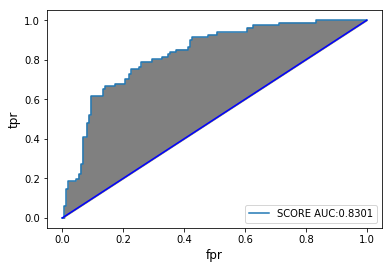

In [0]:
import numpy as np   
#ROC TVP en fonction des TFP
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = "SCORE AUC:"+str(np.round(auc(fpr,tpr),4)))  #arrondi 4 chiffres
plt.plot([0,1],[0,1],color='blue') #1ère bissectrice
plt.ylabel("tpr",fontsize='large')
plt.xlabel("fpr",fontsize='large')
plt.fill_between(fpr, fpr, tpr,color='grey')
plt.legend(loc=4)
plt.show()

7/ On affiche les valeurs des coéficients et les variables associées:

In [0]:
clf.coef_[0]

array([ 2.42425522e-02, -1.51853680e-02, -5.41700553e-03, -3.72285194e-04,
        5.18429618e-02,  5.95564210e-01,  3.09601172e-02])

In [0]:
X_train.columns

Index(['Plas_glucose_conc', 'Dias_blood_pressure', 'Triceps_skin_fold_thi',
       'Hour_serum_insulin', 'Body_mass_index', 'Diabet_pedi_func', 'Age'],
      dtype='object')

## Arbre de décision sur les données diabète

1/ On appelle l'objet arbre de décision. On a les paramètres suivants (non exhaustif):
* criterion : The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
* max_depth : The maximum depth of the tree
* min_samples_split : The minimum number of samples required to split an internal node
* max_features : The number of features to consider when looking for the best split

In [0]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2)

2/ On entraine le modèle avec X_train et Y_train:

In [0]:
dtc.fit(X_train,Y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

3/ On calcule les prévisions puis la précision du modèle:

In [0]:
Y_pred = dtc.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.7445887445887446

4/ On affiche la matrice de confusion:

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred)

array([[132,  18],
       [ 41,  40]])

5/On dessine l'arbre de décision:

In [0]:
#from sklearn.tree import plot_tree
#plot_tree(dtc.fit(X_train,Y_train)) 

In [0]:
import graphviz 
from sklearn.tree import export_graphviz
import graphviz
dot_data = export_graphviz(dtc, out_file=None) 
graph = graphviz.Source(dot_data) 
graph.render("diabete") 

'diabete.pdf'

6/On calcule les prévisons en probabilité du modèle

In [0]:
Y_pred_prob = dtc.predict_proba(X_test)

7/ On calcule le score auc

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,dtc.predict_proba(X_test)[:,1])

0.7664609053497942

8/ On trace la courbe ROC: on utilise la fonction sklearn.metrics.roc_curve qui calcul les taux de faux positive (fpr) et les taux de vrais positif (tpr) ainsi que le seuils threshold

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test,dtc.predict_proba(X_test)[:,1])
auc(fpr,tpr)

0.7664609053497942

<function matplotlib.pyplot.show(*args, **kw)>

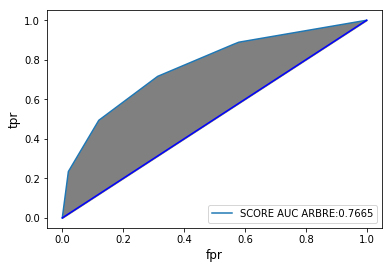

In [0]:
import numpy as np

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = "SCORE AUC ARBRE:"+str(np.round(auc(fpr,tpr),4)))
plt.plot([0,1],[0,1],color='blue')
plt.ylabel("tpr",fontsize='large')
plt.xlabel("fpr",fontsize='large')
plt.fill_between(fpr, fpr, tpr,color='grey')
plt.legend(loc=4)
plt.show

9/On étudie l'importance des features:

In [0]:
import numpy as np
importance = dtc.feature_importances_
nom_feature = X_train.columns 

index = np.argsort(importance)[::-1]

nom_feature_ord = nom_feature[index]
importance_ord = np.round(100*importance[index],2)

array([56.54, 23.77, 19.69,  0.  ,  0.  ,  0.  ,  0.  ])

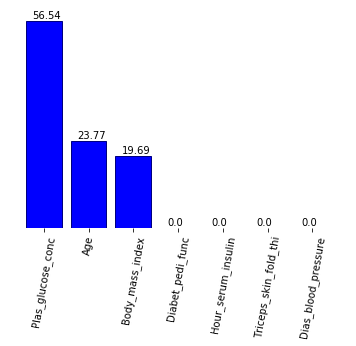

In [0]:
import numpy as np
import matplotlib.pyplot as plt

y_pos = np.arange(len(nom_feature_ord))



plt.bar(y_pos,importance_ord,edgecolor='navy',color='blue')
plt.xticks(y_pos,nom_feature_ord,color='black',rotation=80)
plt.box(False)
plt.yticks([])
for i in range(0,len(nom_feature_ord)):
    plt.text(y_pos[i]-0.25,importance_ord[i]+0.5,str(importance_ord[i]))
plt.show()

### Random forest sur les données diabète

Le principe d'une forest aléatoire est de construire un plusieurs arbres de décision indépendant (bagging) et d'assembler leurs prédiction. Chaque arbre peut être vue comme un individue qui vote. C'est le vote majoritaire qui est la prédiction.

1/ On va construire un arbre de décision rdf avec les paramètres suivants:
* n_estimators=300 (nombre d'arbre est 300)
* criterion='gini': The function to measure the quality of a split.
* max_depth=7 : The maximum depth of the tree.
* min_samples_split=3 : The minimum number of samples required to split an internal node

In [0]:
from sklearn.ensemble import RandomForestClassifier
rdf = RandomForestClassifier(n_estimators=300, criterion='gini',\
                             random_state=1998,max_depth=7, min_samples_split=3,min_samples_leaf=2)
rdf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=7, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=1998, verbose=0,
            warm_start=False)

2/ On calcule la précision du modèle

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,rdf.predict(X_test))

0.7705627705627706

3/ On calcule le score AUC

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,rdf.predict_proba(X_test)[:,1])

0.8411522633744857

4/ On construit la courbe ROC avec X_test et Y_test:

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test,rdf.predict_proba(X_test)[:,1])
auc(fpr,tpr)

0.8411522633744857

<function matplotlib.pyplot.show(*args, **kw)>

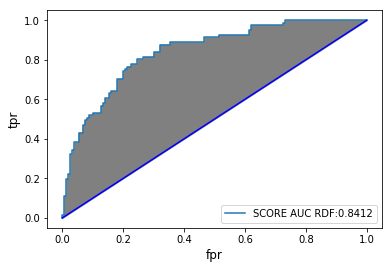

In [0]:
import numpy as np

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = "SCORE AUC RDF:"+str(np.round(auc(fpr,tpr),4)))
plt.plot([0,1],[0,1],color='blue')
plt.ylabel("tpr",fontsize='large')
plt.xlabel("fpr",fontsize='large')
plt.fill_between(fpr, fpr, tpr,color='grey')
plt.legend(loc=4)
plt.show

# Exercice : Machine learning sur le le dataset contraceptive-method-choice

Dans cette section on applique la régression logistique et l'arbre aléatoire au dataset travel insurance. Dans une premiere partie on manipule les données. Vous devez executer les cellule tout en lisant attentivement cette partie. Il faudrat comprendre cette dernière pour pouvoir fair le projet.<br>
Le dataset vient du site kaggle : https://www.kaggle.com/faizunnabi/contraceptive-method-choice.<br> 
Vous pouvez charger les données en suivant ce lien: https://1drv.ms/t/s!Am09h0q2OIX0ccOvloeR-pTUI1Y?e=y2pPgL

### Manipulation des données 
Dans ce dataset nous avons les variables suivantes:
 1. Wife's age (numerical)
 2. Wife's education (categorical) 1=low, 2, 3, 4=high
 3. Husband's education (categorical) 1=low, 2, 3, 4=high
 4. Number of children ever born (numerical)
 5. Wife's religion (binary) 0=Non-Islam, 1=Islam
 6. Wife's now working? (binary) 0=Yes, 1=No
 7. Husband's occupation (categorical) 1, 2, 3, 4
 8. Standard-of-living index (categorical) 1=low, 2, 3, 4=high
 9. Media exposure (binary) 0=Good, 1=Not good
 10. Contraceptive method used (class attribute) 1=No-use ,2=Long-term,3=Short-term
 
La variable Contraceptive method used est la variable que l'on veut prédire  

On importe les données:

In [0]:
import pandas as pd
#remplacer le chemin
NON_VAR = ['WIFE_AGE','WIFE_EDU','HUSB_EDU','NUM_OF_CHILD',\
           'WIFE_RELI','WIFE_WORK','HUSB_OCUP','STA_OF_LIV','MEDIA_EXP','CONTRACEPTIVE']
donnee = pd.read_csv("cmc.data.txt",sep=',',header=None,names=NON_VAR)

On regarde la répartition de la variable cible

In [0]:
donnee['CONTRACEPTIVE'].value_counts()

1    629
3    511
2    333
Name: CONTRACEPTIVE, dtype: int64

On affiche les colonnes du dataset:

In [0]:
donnee.columns

Index(['WIFE_AGE', 'WIFE_EDU', 'HUSB_EDU', 'NUM_OF_CHILD', 'WIFE_RELI',
       'WIFE_WORK', 'HUSB_OCUP', 'STA_OF_LIV', 'MEDIA_EXP', 'CONTRACEPTIVE'],
      dtype='object')

On sépare la colonne Claim que l'on veut prédire des autres:

In [0]:
features = [o for o in donnee.columns if o !='CONTRACEPTIVE']
X = donnee[features]
Y = donnee['CONTRACEPTIVE']

On réduit le problème à 2 classes : 0 n'utilise pas la contraception, 1 utilise la contraception:

In [0]:
import numpy as np
Y_red = np.where(Y==1,0,1) #recodage vaut 0 si contraception=1 vaut 1 sinon

* On dummifie certaine variables catégorielles : 'WIFE_EDU','HUSB_EDU','HUSB_OCUP','STA_OF_LIV'.
* Les varaibles catégorielles 'WIFE_RELI', 'WIFE_WORK', MEDIA_EXP sont déja dummifiés


On convertie les variables a dummifier en caractère/string

In [0]:
import pandas as pd
a_dummies = ['WIFE_EDU','HUSB_EDU','HUSB_OCUP','STA_OF_LIV']  #label

for var in a_dummies:             #dummie=indicator 0/1   loc: accéder aux var par label
    X.loc[:,var] = X.loc[:,var].copy().astype(str)

X_dum = pd.get_dummies(X[a_dummies])   #convertit les var en dummie

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


Ensuite on enlève les varaibles ['WIFE_EDU','HUSB_EDU','HUSB_OCUP','STA_OF_LIV'] et on concatène avec X_dum:

In [0]:
A_garder = [var for var in list(X) if var not in a_dummies]
X = X[A_garder]

X = pd.concat([X,X_dum],axis=1)

### Exercice 1 : régression logistique sur les données contraceptive-method-choice
On utilise X et Y_red: X est l'ensembles des features (variables explicatives). Y_red est la target value, c'est à dire la variable que l'on veut prédire

1/ Diviser en échantillon d'apprentissage et de test. On utilisera train_test_split comme dans l'exemple ci-dessus. On prendra l'option random_state=1998. L'échantillon dapprentissage s'appelle X_train, Y_train et celui de test s'appelle X_test, Y_test.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y_red,test_size=0.33,random_state=1998)

2/ Appeler un modèle de régression logistique, avec les parametre suivants:
* penalty='l2'
* solver='lbfgs'
* C=1/2
* max_iter=1000

Ce medèle s'appelle logit1

In [0]:
from sklearn.linear_model import LogisticRegression
logit1  = LogisticRegression(penalty='l2',random_state=1998, solver='lbfgs',max_iter=1000, multi_class='auto', C=1/2)

3/Entrainer le moèle logit1 avec les données X_train et Y_train.

In [0]:
logit1.fit(X_train,Y_train)

LogisticRegression(C=0.5, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=1000, multi_class='auto',
          n_jobs=None, penalty='l2', random_state=1998, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

4/ Faite la prévision Y_pred que logit1 produit avec X_test. 

In [0]:
Y_pred = logit1.predict(X_test)   #prédiction de Y en fonction de X_test

5/ Calculer la précision du modèle logit1 sur les données de test.

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)  #proportion de prédictions correctes

0.6632443531827515

6/Calculer la matrice de confusion de logit1 sur les donnée X_test, Y_test.

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test,Y_pred) 

array([[ 97, 114],
       [ 50, 226]], dtype=int64)

7/Calculer les prévisions en probabilité du modèle sur les données X_test.

In [0]:
Y_pred_prob = logit1.predict_proba(X_test)    #proba d'appartenir aux classes 0,1

8/Calculer le score AUC du modèle logit1 sur les données.

In [0]:
from sklearn.metrics import roc_auc_score, auc
roc_auc_score(Y_test,logit1.predict_proba(X_test)[:,1])     #score AUC

0.7064015385672093

9/ tracer la cource ROC de logit1 sur les données X_test, Y_test

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, threshold = roc_curve(Y_test,logit1.predict_proba(X_test)[:,1])
auc(fpr,tpr)

0.7064015385672093

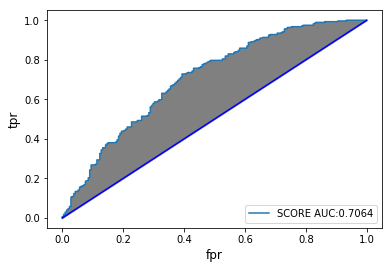

In [0]:
import numpy as np   
#ROC TVP en fonction des TFP
import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = "SCORE AUC:"+str(np.round(auc(fpr,tpr),4)))  #arrondi 4 chiffres
plt.plot([0,1],[0,1],color='blue') #1ère bissectrice
plt.ylabel("tpr",fontsize='large')
plt.xlabel("fpr",fontsize='large')
plt.fill_between(fpr, fpr, tpr,color='grey')
plt.legend(loc=4)
plt.show()

### Exercice 2 : arbre de décision

1/ Diviser en échantillon d'apprentissage et de test. On utilisera train_test_split comme dans l'exemple ci-dessus. On prendra l'option random_state=1998. L'échantillon dapprentissage s'appelle X_train, Y_train et celui de test s'appelle X_test, Y_test.

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test,Y_train, Y_test = train_test_split(X,Y_red,test_size=0.33,random_state=1998)

2/ Faire un modele d'arbre de décision sklearn.tree.DecisionTreeClassifier. Ce modele s'appelle arbre.

In [0]:
from sklearn.tree import DecisionTreeClassifier
arbre = DecisionTreeClassifier(criterion='gini',max_depth=3,min_samples_split=2)

3/ Entrainer le modèle arbre avec les données X_train et Y_train 

In [0]:
arbre.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

4/ Calculer les prédictions Y_pred du modèle arbre sur les données X_test. 

In [0]:
Y_pred = arbre.predict(X_test)

5/ Calculer la précision du modèle arbre sur les données X_test et Y_test

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.6817248459958932

6/ Faire un modèle d'arbre de décision arbrebis avec les paramètre suivants
* random_state=1998
* criterion='gini'
* max_depth=9
* min_samples_split=4
* min_samples_leaf=3
En trainer ce modèle

In [0]:
from sklearn.tree import DecisionTreeClassifier
arbrebis = DecisionTreeClassifier(random_state=1998,criterion='gini',max_depth=9,min_samples_split=4,min_samples_leaf=3)

In [0]:
arbrebis.fit(X_train,Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=9,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=4,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1998,
            splitter='best')

7/Calculer la précision du modèle sur les données X_test et Y_test.

In [0]:
Y_pred = arbrebis.predict(X_test)

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,Y_pred)

0.702258726899384

8/ Calculer la prédiction en probabilité du modèle arbrebis sur X_test, Y_test.

In [0]:
Y_pred_prob = arbrebis.predict_proba(X_test)

9/ Caluler le score AUC du modèle arbrebis sur les données X_test et Y_test.

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,arbrebis.predict_proba(X_test)[:,1])

0.7134332715159009

10/ Faire la courbe roc du modèle arbrebis

In [0]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(Y_test,arbrebis.predict_proba(X_test)[:,1])
auc(fpr,tpr)

0.7134332715159009

<function matplotlib.pyplot.show(*args, **kw)>

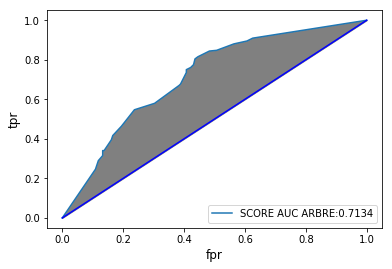

In [0]:
import numpy as np

import matplotlib.pyplot as plt
plt.plot(fpr,tpr,label = "SCORE AUC ARBRE:"+str(np.round(auc(fpr,tpr),4)))
plt.plot([0,1],[0,1],color='blue')
plt.ylabel("tpr",fontsize='large')
plt.xlabel("fpr",fontsize='large')
plt.fill_between(fpr, fpr, tpr,color='grey')
plt.legend(loc=4)
plt.show

11/Ilustrer l'importance des features par un diagramme en baton. On gardera les 15 features les plus importants.

<function matplotlib.pyplot.show(*args, **kw)>

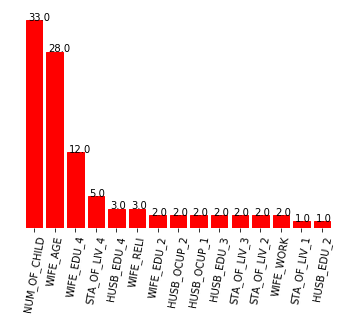

In [0]:
NON_FEATURES = X_train.columns

import numpy as np
IMPORTANCE_FEATURES = 100*np.round(arbrebis.feature_importances_,2)
loca = np.arange(len(IMPORTANCE_FEATURES))

index = np.argsort(IMPORTANCE_FEATURES)[::-1]

#on ordonne 
IMPORTANCE_FEATURES = IMPORTANCE_FEATURES[index][0:15]
NON_FEATURES = NON_FEATURES[index][0:15]
loca  = loca[0:15]

import matplotlib.pyplot as plt
plt.bar(loca,IMPORTANCE_FEATURES,edgecolor='red',color='red')
plt.yticks([])
plt.xticks(loca,NON_FEATURES,color='black',rotation=80)
plt.box(False)
for i in range(0,len(NON_FEATURES)):
    plt.text(loca[i]-0.3,IMPORTANCE_FEATURES[i],str(np.round(IMPORTANCE_FEATURES[i],1)))
plt.show

### Exercice 3 : random forest sur les données contraceptive-method-choice

1/ Faire un modèle de random forest randfo de la manière suivante:
* criterion='gini'
* random_state=1998
* la profondeur de chaques arbre est 9
* min_samples_split=3
* min_samples_leaf=2
* max_features=0.7
Entrainer le modèle randfo avec les données X_train et Y_train

In [0]:
from sklearn.ensemble import RandomForestClassifier
randfo = RandomForestClassifier(n_estimators=300, criterion='gini', random_state=1998, \
                                max_depth=9, min_samples_split=3,min_samples_leaf=2,max_features=0.7)

In [0]:
randfo.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=9, max_features=0.7, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=2, min_samples_split=3,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=None,
            oob_score=False, random_state=1998, verbose=0,
            warm_start=False)

2/Donner une interpretation du paramètre max_features.

Pour chaque arbre, max_features représente la taille du sous-échantillon de régresseurs choisi aléatoirement parmis les régresseurs qu'on utilise pour trouver la meilleure séparation possible d'un noeud. 
Ici on considère 70% des régresseurs. 

3/ Calculer la précision randfo sur X_test et Y_test.

In [0]:
from sklearn.metrics import accuracy_score
accuracy_score(Y_test,randfo.predict(X_test))

0.7268993839835729

4/ Calculer le score AUC de randfo sur X_test et Y_test.

In [0]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_test,randfo.predict_proba(X_test)[:,1])

0.7696957208599492